In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import numpy as np
import plotly.express as px

root_dir = pathlib.Path().resolve().parents[0]
data_dir = root_dir / "data"

import plotly.io as pio
pio.renderers.default="notebook"

In [2]:
filename = data_dir / "uk_residents_visits_abroad_2017_to_2021.xlsx"

df = (pd.read_excel(filename, sheet_name="3.06", header=[10]))

df = df.rename(columns={
    'Unnamed: 0': 'Country Visited',
    '(%)': 'Average Annual Growth (2015-2019) (%)'})

df = df.dropna(how='all', axis=1)

df = pd.DataFrame(df.values[2:67], columns=df.columns)

df.columns = df.columns.map(str)
df['2020'] = df['2020'].replace('-', np.nan)

In [35]:
europe_df = df.iloc[3:31]
europe_df

,Country Visited,2017,2018,2019,2020,2021,Average Annual Growth (2015-2019) (%)
3,Austria,700.363024,695.2224,730.039312,NaN,87.978297,-40.466271
4,Belgium,2062.531629,2086.604262,2099.733139,NaN,199.208677,-44.252306
5,Bulgaria,596.498885,690.975244,718.205993,NaN,215.020062,-22.515054
6,Czech Republic,687.084772,625.390577,777.159122,NaN,100.142625,-38.212281
7,Cyprus,1018.88126,877.820187,1047.336712,NaN,247.850544,-29.770985
8,Denmark,566.683571,561.864448,518.657114,NaN,107.962543,-33.933223
9,Finland,207.481903,316.21628,221.745926,NaN,129.115707,-11.182261
10,France,10642.011141,10851.768344,10346.708101,NaN,1593.26101,-37.796359
11,Germany,3578.880748,3625.167611,3374.994715,NaN,520.207249,-38.254218
12,Greece,2707.737435,2908.252631,3438.200015,NaN,1147.989336,-19.307564


## Average over years

In [36]:
europe_df['Average'] = europe_df[['2017', '2018', '2019', '2020', '2021']].mean(axis=1)

C:\Users\ab78\AppData\Local\Temp\ipykernel_47056\1535240155.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Histograms

In [46]:
fig = px.histogram(europe_df, x="Average", nbins=30, marginal="box")
fig.update_layout(
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    title="Histogram of the average numbers of visits made to European Countries",
    xaxis_title="Visits",
    template="simple_white",
    title_x=0.5,
    width=800
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.update_traces(notched=False, selector=dict(type='box'))

fig.show()

In [56]:
fig = px.histogram(europe_df, x="Average", nbins=30)
fig.update_layout(
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    title="Histogram of the average numbers of visits made to European Countries",
    xaxis_title="Visits",
    template="simple_white",
    title_x=0.5,
)
fig.add_vline(
    x=europe_df['Average'].median(), 
    line_width=3, 
    line_dash="dash", 
    line_color="black", 
    opacity=0.3, 
    annotation_text="Median", 
    annotation_position="top right", 
    annotation_textangle = -90
)

fig.add_vline(
    x=europe_df['Average'].mean(), 
    line_width=3, 
    line_dash="dash", 
    line_color="black", 
    opacity=0.7, 
    annotation_text="Mean", 
    annotation_position="top right",
    annotation_textangle = -90
)

fig.add_vline(
    x=europe_df['Average'].std(), 
    line_width=3, 
    line_dash="dash", 
    line_color="black", 
    opacity=0.3, 
    annotation_text="std", 
    annotation_position="top right",
    annotation_textangle = -90
)


fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.show()

### Visits to countries

In [52]:
europe_df['Average'].describe()

count       28.000000
mean      2027.901065
std       3001.950372
min         67.916312
25%        431.318970
50%        903.721265
75%       2563.024528
max      14482.996250
Name: Average, dtype: float64

In [53]:
print(europe_df['Average'].mean())
print(europe_df['Average'].median())
print(europe_df['Average'].min())
print(europe_df['Average'].max())
#print(europe_df['2017'].std())

2027.901065281554
903.7212649672449
67.91631156025461
14482.996249824979


In [54]:
sort_europe_df = europe_df.copy().sort_values(by='Average', ascending=False)
display(sort_europe_df)
fig = px.bar(sort_europe_df, x="Country Visited", y='Average',title="European Countries Visited")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    title="Number of visits to Europe by main country visited",
    yaxis_title="Number of visits (thousands)",
    xaxis_title="Main county visited",
    template="simple_white",
    title_x=0.5,
    height=700
)

fig.add_hline(y=europe_df['Average'].mean(), line_width=2, line_dash="dash", line_color="black",opacity=0.5,
              annotation_text="Mean", 
              annotation_position="top right")

fig.add_hline(y=europe_df['Average'].median(), line_width=2, line_dash="dash", line_color="black", opacity=0.5,
              annotation_text="Median", 
              annotation_position="top right")

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

display(fig)

,Country Visited,2017,2018,2019,2020,2021,Average Annual Growth (2015-2019) (%),Average
26,Spain,17650.942237,17926.535445,18129.274223,NaN,4225.233093,-30.052742,14482.996250
10,France,10642.011141,10851.768344,10346.708101,NaN,1593.26101,-37.796359,8358.437149
15,Italy,4900.832909,5293.690735,5105.093561,NaN,855.518312,-35.361711,4038.783880
14,Republic of Ireland,4576.082491,4695.284855,4786.163992,NaN,1050.763665,-30.77662,3777.073751
11,Germany,3578.880748,3625.167611,3374.994715,NaN,520.207249,-38.254218,2774.812581
22,Portugal,3269.825648,3320.447486,3311.319824,NaN,1164.442908,-22.750015,2766.508966
19,Netherlands,3117.772687,3362.917813,3573.046296,NaN,348.117406,-42.194346,2600.463551
12,Greece,2707.737435,2908.252631,3438.200015,NaN,1147.989336,-19.307564,2550.544854
21,Poland,3056.934252,2943.647583,3231.163852,NaN,941.87667,-25.496447,2543.405589
30,Rest of Europe,1958.76132,2036.468415,2286.945592,NaN,816.260878,-19.654443,1774.609052


### Visits to Top 8 Countries Box plot

In [14]:
europe_dfT = europe_df[['Country Visited', '2017', '2018', '2019', '2020', '2021']].set_index('Country Visited', drop=True).T
europe_dfT

Country Visited,Austria,Belgium,Bulgaria,Czech Republic,Cyprus,Denmark,Finland,France,Germany,Greece,...,Poland,Portugal,Romania,Russia,Slovakia,Spain,Sweden,Switzerland,Turkey,Rest of Europe
2017,700.363024,2062.531629,596.498885,687.084772,1018.88126,566.683571,207.481903,10642.011141,3578.880748,2707.737435,...,3056.934252,3269.825648,1156.151789,233.043245,213.866793,17650.942237,474.053225,1189.564799,1453.942973,1958.76132
2018,695.2224,2086.604262,690.975244,625.390577,877.820187,561.864448,316.21628,10851.768344,3625.167611,2908.252631,...,2943.647583,3320.447486,1226.33116,164.322856,223.217362,17926.535445,532.217743,1319.488398,1745.065407,2036.468415
2019,730.039312,2099.733139,718.205993,777.159122,1047.336712,518.657114,221.745926,10346.708101,3374.994715,3438.200015,...,3231.163852,3311.319824,1292.528637,209.067697,233.833027,18129.274223,514.551567,1348.672907,2291.408996,2286.945592
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,87.978297,199.208677,215.020062,100.142625,247.850544,107.962543,129.115707,1593.26101,520.207249,1147.989336,...,941.87667,1164.442908,647.152887,43.597677,63.687867,4225.233093,114.777963,180.155313,350.871305,816.260878


In [15]:
s = europe_dfT.sum()
europe_dfT_top = europe_dfT[s.sort_values(ascending=False).index[:8]]
europe_dfT_top

Country Visited,Spain,France,Italy,Republic of Ireland,Germany,Portugal,Netherlands,Greece
2017,17650.942237,10642.011141,4900.832909,4576.082491,3578.880748,3269.825648,3117.772687,2707.737435
2018,17926.535445,10851.768344,5293.690735,4695.284855,3625.167611,3320.447486,3362.917813,2908.252631
2019,18129.274223,10346.708101,5105.093561,4786.163992,3374.994715,3311.319824,3573.046296,3438.200015
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,4225.233093,1593.26101,855.518312,1050.763665,520.207249,1164.442908,348.117406,1147.989336


In [16]:
fig = go.Figure()

for col in europe_dfT_top:
    fig.add_trace(go.Box(x=europe_dfT_top[col].values, name=europe_dfT_top[col].name))
    
fig.update_layout(
    width=900, 
    height=800, 
    template="plotly_white", 
    title='Number of visits to top 8 European countries between 2017 and 2021 by main country visited',
    title_x=0.5,
    xaxis_title="Number of visits (thousands)",
    yaxis_title="Main county visited",
    #yaxis={'categoryorder':'total ascending'},
    legend_traceorder="reversed",
    xaxis={
        'range':[0,20000]
    }
)
    
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')


fig.show()

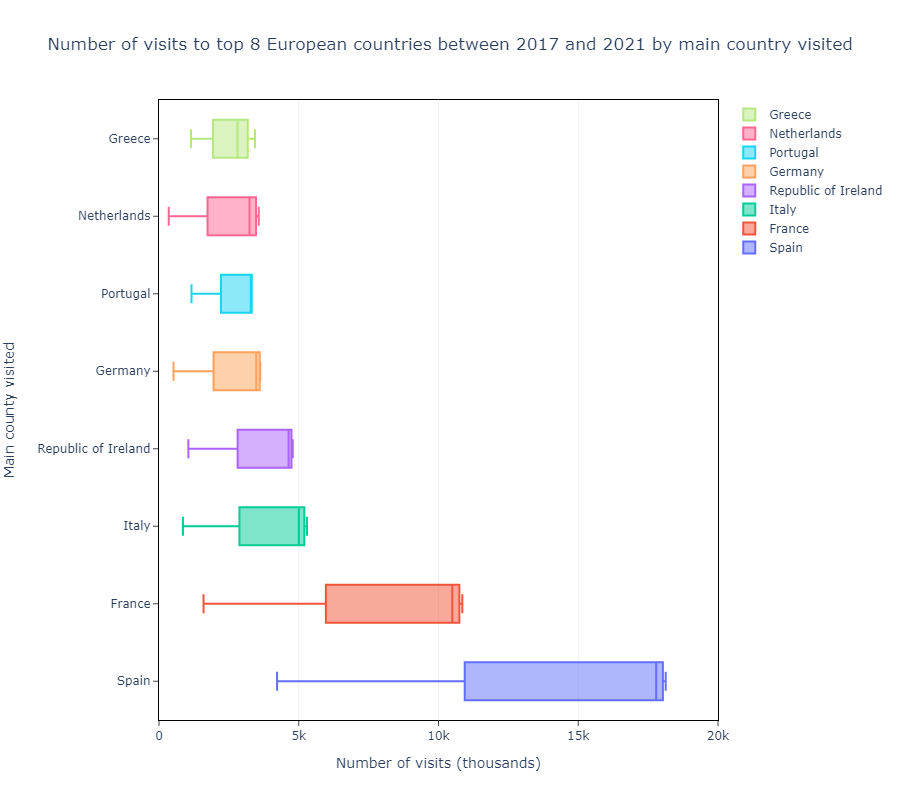

### Visits to countries

In [19]:
import plotly.express as px
fig = px.bar(europe_df, y="Country Visited", x='Average', orientation='h',text_auto='.2s',title="Average number of visits to European countries between 2017 and 2021 by main country visited")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    uniformtext_minsize=8, 
    uniformtext_mode='hide', 
    width=800, 
    height=800, 
    template="plotly_white", 
    title_x=0.55,
    xaxis_title="Average number of visits (thousands)",
    yaxis_title="Main county visited",
    yaxis={'categoryorder':'total ascending'},
    legend_traceorder="reversed"
)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

display(fig)

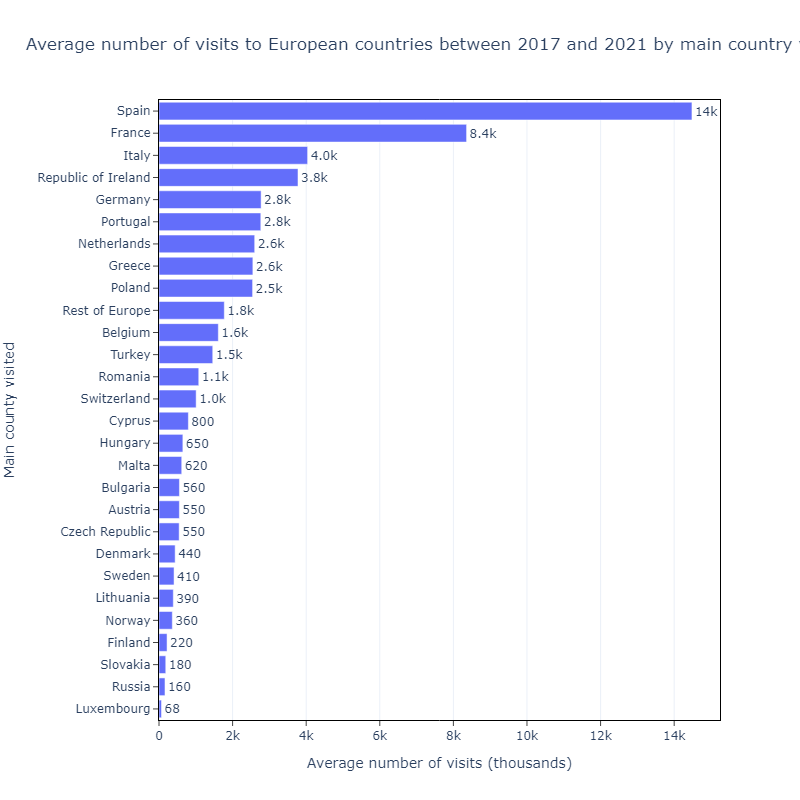

In [24]:
fig = px.pie(
    europe_df, 
    values='Average', 
    names='Country Visited', 
    title='Average number of visits to Europe by main country visited'
)
fig.show()

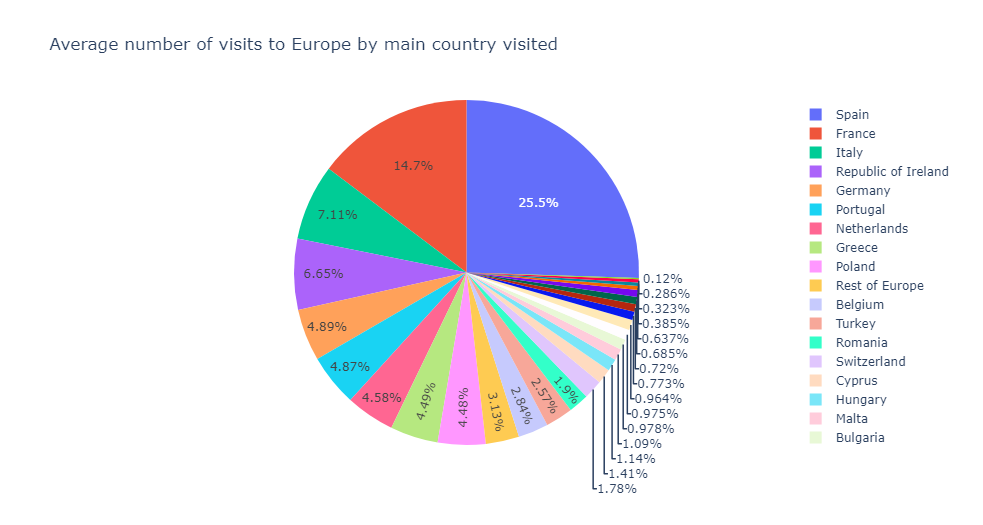

## Number of visits to europe before and after covid
Hypothesis: Number of visits abroad significantly decreased the year of and after covid

In [25]:
europe_dfT.index = europe_dfT.index.astype('str')
europe_dfT['Total Europe'] = europe_dfT.sum(axis=1)
europe_dfT

Country Visited,Austria,Belgium,Bulgaria,Czech Republic,Cyprus,Denmark,Finland,France,Germany,Greece,...,Portugal,Romania,Russia,Slovakia,Spain,Sweden,Switzerland,Turkey,Rest of Europe,Total Europe
2017,700.363024,2062.531629,596.498885,687.084772,1018.88126,566.683571,207.481903,10642.011141,3578.880748,2707.737435,...,3269.825648,1156.151789,233.043245,213.866793,17650.942237,474.053225,1189.564799,1453.942973,1958.76132,68328.982692
2018,695.2224,2086.604262,690.975244,625.390577,877.820187,561.864448,316.21628,10851.768344,3625.167611,2908.252631,...,3320.447486,1226.33116,164.322856,223.217362,17926.535445,532.217743,1319.488398,1745.065407,2036.468415,70511.865862
2019,730.039312,2099.733139,718.205993,777.159122,1047.336712,518.657114,221.745926,10346.708101,3374.994715,3438.200015,...,3311.319824,1292.528637,209.067697,233.833027,18129.274223,514.551567,1348.672907,2291.408996,2286.945592,72470.904145
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2021,87.978297,199.208677,215.020062,100.142625,247.850544,107.962543,129.115707,1593.26101,520.207249,1147.989336,...,1164.442908,647.152887,43.597677,63.687867,4225.233093,114.777963,180.155313,350.871305,816.260878,15813.166613


In [26]:
fig = go.Figure(go.Scatter(
    x = europe_dfT.index,
    y = europe_dfT['Total Europe']
))

fig.update_layout(
#     width=800, 
#     height=800, 
    template="plotly_white", 
    title='Number of visits to European countries between 2017 and 2021',
    title_x=0.55,
    yaxis_title="Number of visits (thousands)",
    xaxis_title="Year",
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

fig.show()

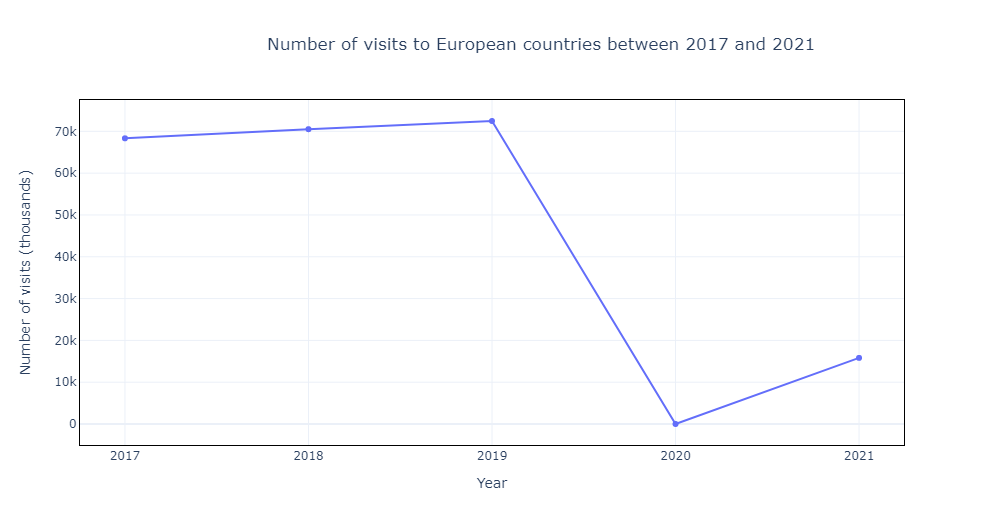

In [27]:
import plotly.express as px
fig = px.bar(europe_dfT, x=europe_dfT.index, y='Total Europe', text_auto='.2s',title="European Countries Visited")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    title='Total Number of Visits to European Countries Between 2017 and 2021',
    yaxis_title="Total number of visits (thousands)",
    xaxis_title="Year",
    template="simple_white",
    title_x=0.5,
    height=500,
    #margin=dict(l=20, r=20, t=80, b=30)
)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black')

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    range = [0,80000]
)

display(fig)

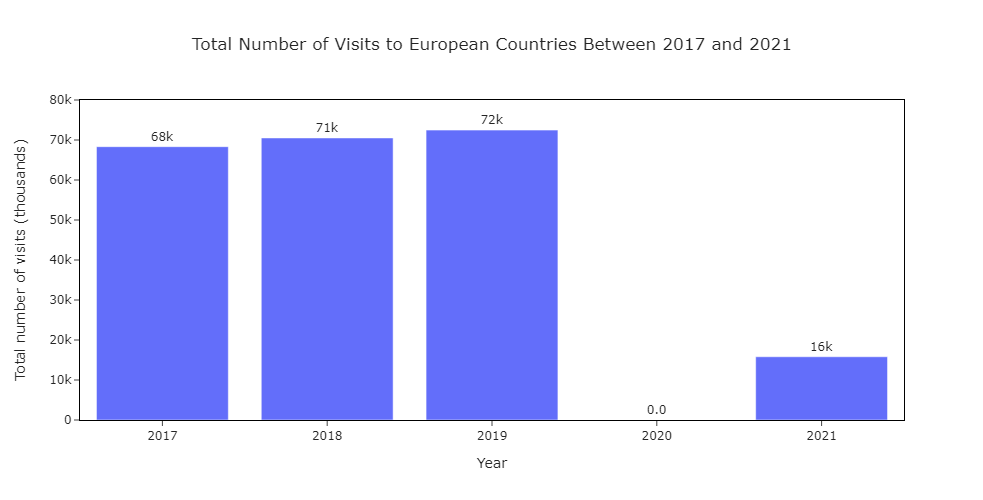

## Map

In [30]:
europe_df = europe_df.set_index('Country Visited', drop=True)

In [31]:
europe_df

,2017,2018,2019,2020,2021,Average Annual Growth (2015-2019) (%),Average,2019_2021_difference_%
Country Visited,,,,,,,,
Austria,700.363024,695.2224,730.039312,NaN,87.978297,-40.466271,553.400758,-87.948827
Belgium,2062.531629,2086.604262,2099.733139,NaN,199.208677,-44.252306,1612.019427,-90.512667
Bulgaria,596.498885,690.975244,718.205993,NaN,215.020062,-22.515054,555.175046,-70.061505
Czech Republic,687.084772,625.390577,777.159122,NaN,100.142625,-38.212281,547.444274,-87.11427
Cyprus,1018.88126,877.820187,1047.336712,NaN,247.850544,-29.770985,797.972176,-76.335161
Denmark,566.683571,561.864448,518.657114,NaN,107.962543,-33.933223,438.791919,-79.184216
Finland,207.481903,316.21628,221.745926,NaN,129.115707,-11.182261,218.639954,-41.773132
France,10642.011141,10851.768344,10346.708101,NaN,1593.26101,-37.796359,8358.437149,-84.601276
Germany,3578.880748,3625.167611,3374.994715,NaN,520.207249,-38.254218,2774.812581,-84.586428


In [33]:
fig = go.Figure(data=go.Choropleth(
    locations=europe_df.index, # Spatial coordinates
    z = europe_df['Average'].astype(float), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Thousands",
))

fig.update_layout(
    title_text = 'Average Number of Visits to European Countries Between 2017 and 2021',
    geo_scope='europe', # limit map scope to Europe
    title_x=0.5,
)

# fig.update_geos(
#     center=dict(lat=54.5260, lon=15.2551),
# #    lataxis_range=[-10,50], lonaxis_range=[20, 100]
# )
fig.update_layout(height=600, width=800,)
#fig.update_layout(margin=dict(l=60, r=60, t=60, b=60))

fig

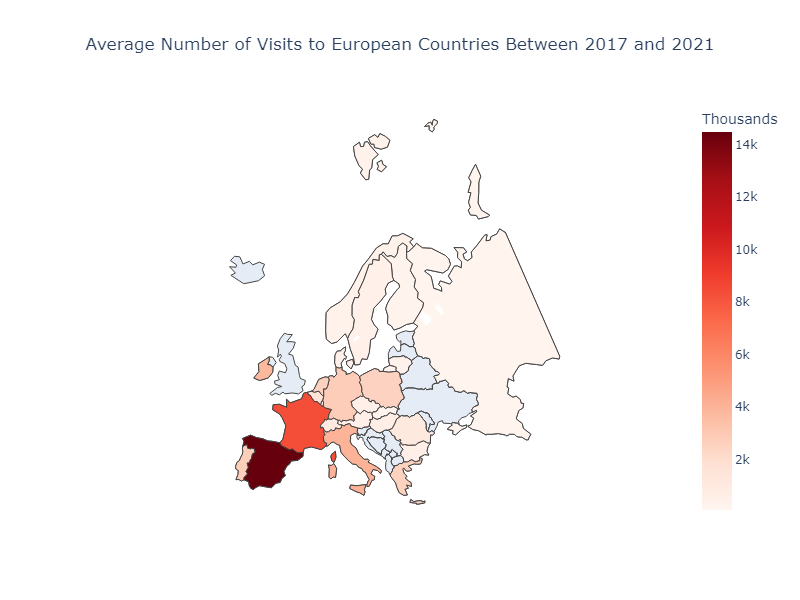

In [34]:
fig = px.scatter_geo(europe_df, locations=europe_df.index,locationmode="country names",
                     size=(europe_df['Average']).tolist(),
                     #center=dict(lat=51.0057, lon=13.7274),
                     projection="natural earth")

# add country names to plot

fig.update_layout(
    title_text = 'Average visits to European Countries',
    geo_scope='europe', # limit map scope to Europe,
)
fig.show()

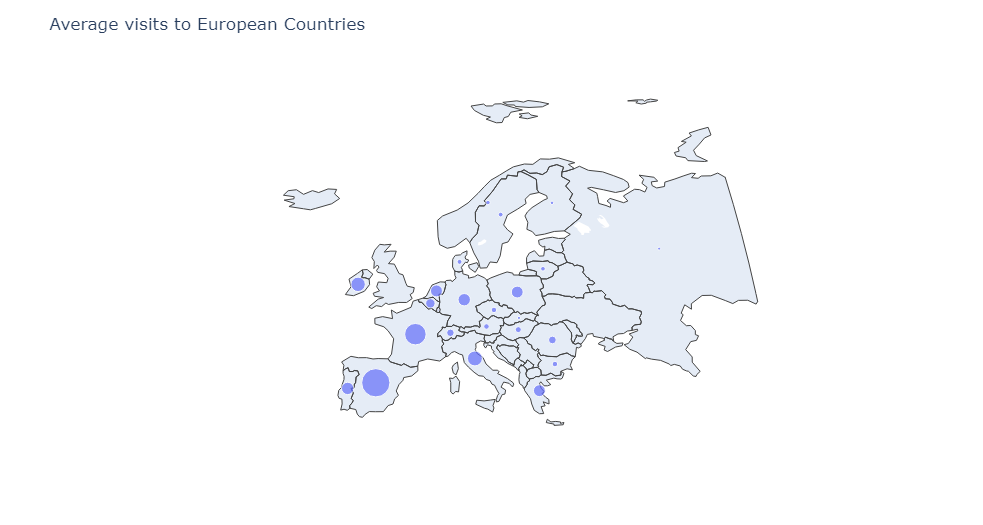